In [128]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
q34 = pd.read_csv("Divvy_Stations_Trips_2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv")

In [3]:
q34.head()

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55


In [7]:
q4 = pd.read_csv("Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q4.csv")

In [15]:
q4.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4413167,12/31/2014 23:54,12/31/2014 23:57,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0
1,4413166,12/31/2014 23:50,12/31/2014 23:52,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0
2,4413165,12/31/2014 23:48,1/1/2015 0:38,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN
3,4413164,12/31/2014 23:46,1/1/2015 0:37,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0
4,4413163,12/31/2014 23:44,1/1/2015 0:10,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0


Data Preprocessing

In [24]:
q4["starttime"] = pd.to_datetime(q4["starttime"])
q4["stoptime"] = pd.to_datetime(q4["stoptime"])

In [28]:
q4["startdate"] = q4['starttime'].dt.date
q4["stopdate"] = q4['stoptime'].dt.date

In [31]:
q4.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,startdate,stopdate
0,4413167,2014-12-31 23:54:00,2014-12-31 23:57:00,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0,2014-12-31,2014-12-31
1,4413166,2014-12-31 23:50:00,2014-12-31 23:52:00,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0,2014-12-31,2014-12-31
2,4413165,2014-12-31 23:48:00,2015-01-01 00:38:00,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN,2014-12-31,2015-01-01
3,4413164,2014-12-31 23:46:00,2015-01-01 00:37:00,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0,2014-12-31,2015-01-01
4,4413163,2014-12-31 23:44:00,2015-01-01 00:10:00,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0,2014-12-31,2015-01-01


In [34]:
startdate = q4.groupby(['startdate','from_station_id']).count()

In [59]:
stopdate = q4.groupby(['startdate','to_station_id']).count()

In [74]:
startdate.head(5)

trip_id  starttime  stoptime  bikeid  \
startdate  from_station_id                                         
2014-10-01 5                     34         34        34      34   
           13                    34         34        34      34   
           14                    10         10        10      10   
           15                    12         12        12      12   
           16                    20         20        20      20   

                            tripduration  from_station_name  to_station_id  \
startdate  from_station_id                                                   
2014-10-01 5                          34                 34             34   
           13                         34                 34             34   
           14                         10                 10             10   
           15                         12                 12             12   
           16                         20                 20             20   

                            to_station_name  usertype  gender  birthyear  \
startdate  from_station_id                                                 
2014-10-01 5                             34        34      25         25   
           13                            34        34      32         32   
           14                            10        10       8          8   
           15                            12        12      11         11   
           16                            20        20      16         16   

                            stopdate  
startdate  from_station_id            
2014-10-01 5                      34  
           13                     34  
           14                     10  
           15                     12  
           16                     20

In [107]:
stopdate.head(5)

stop_trip_id  starttime  stoptime  bikeid  \
startdate  to_station_id                                              
2014-10-01 5                        29         29        29      29   
           13                       38         38        38      38   
           14                        8          8         8       8   
           15                       19         19        19      19   
           16                       28         28        28      28   

                          tripduration  from_station_id  from_station_name  \
startdate  to_station_id                                                     
2014-10-01 5                        29               29                 29   
           13                       38               38                 38   
           14                        8                8                  8   
           15                       19               19                 19   
           16                       28               28                 28   

                          to_station_name  usertype  gender  birthyear  \
startdate  to_station_id                                                 
2014-10-01 5                           29        29      24         24   
           13                          38        38      36         36   
           14                           8         8       7          7   
           15                          19        19      16         16   
           16                          28        28      24         24   

                          stopdate  
startdate  to_station_id            
2014-10-01 5                    29  
           13                   38  
           14                    8  
           15                   19  
           16                   28

In [77]:
new_columns = startdate.columns.values  
new_columns[0] = 'start_trip_id'
startdate.columns  = new_columns

In [78]:
new_columns = stopdate.columns.values  
new_columns[0] = 'stop_trip_id'
stopdate.columns  = new_columns

In [101]:
diff = pd.concat([startdate["start_trip_id"], stopdate["stop_trip_id"]], axis=1)
diff.reset_index(inplace = True)

In [105]:
diff = pd.merge(left=diff, right=q34, left_on='level_1', right_on='id')

In [115]:
diff = diff.drop(columns=['name', 'latitude','longitude','dateCreated'])

In [118]:
diff["capacity-out+in"] = diff['dpcapacity'] + diff["stop_trip_id"] - diff["start_trip_id"]

In [119]:
diff

,level_0,level_1,start_trip_id,stop_trip_id,id,dpcapacity,capacity-out+in
0,2014-10-01,5,34.0,29.0,5,19,14.0
1,2014-10-02,5,28.0,28.0,5,19,19.0
2,2014-10-03,5,26.0,26.0,5,19,19.0
3,2014-10-04,5,6.0,6.0,5,19,19.0
4,2014-10-05,5,16.0,19.0,5,19,22.0
...,...,...,...,...,...,...,...
26543,2014-12-23,336,1.0,1.0,336,15,15.0
26544,2014-12-24,336,1.0,1.0,336,15,15.0
26545,2014-12-29,336,1.0,NaN,336,15,NaN
26546,2014-12-30,336,1.0,1.0,336,15,15.0


Let's check the stations that needs to install more bike docks first.

In [122]:
stations = diff[diff["capacity-out+in"] <= 2]
stations

,level_0,level_1,start_trip_id,stop_trip_id,id,dpcapacity,capacity-out+in
96,2014-10-05,13,39.0,22.0,13,19,2.0
101,2014-10-10,13,36.0,17.0,13,19,0.0
551,2014-10-02,19,40.0,25.0,19,15,0.0
559,2014-10-10,19,31.0,18.0,19,15,2.0
1016,2014-10-08,24,61.0,48.0,24,15,2.0
...,...,...,...,...,...,...,...
25314,2014-11-01,338,35.0,19.0,338,15,-1.0
25358,2014-12-15,338,20.0,7.0,338,15,2.0
25676,2014-10-29,342,32.0,18.0,342,15,1.0
26260,2014-10-05,349,40.0,26.0,349,15,1.0


In [127]:
stationsday = stations.groupby(['id']).count()
stationsday

,level_0,level_1,start_trip_id,stop_trip_id,dpcapacity,capacity-out+in
id,,,,,,
13,2,2,2,2,2,2
19,2,2,2,2,2,2
24,3,3,3,3,3,3
25,1,1,1,1,1,1
26,1,1,1,1,1,1
...,...,...,...,...,...,...
309,1,1,1,1,1,1
324,1,1,1,1,1,1
338,3,3,3,3,3,3


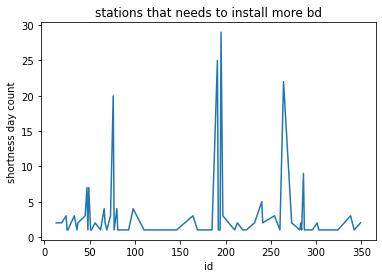

In [131]:
plt.plot(stationsday["level_1"])
plt.title("stations that needs to install more bd")
plt.xlabel("id")
plt.ylabel("shortness day count")
plt.show()

In [141]:
stationsday[stationsday['level_1'] > 5]

,level_0,level_1,start_trip_id,stop_trip_id,dpcapacity,capacity-out+in
id,,,,,,
47,7,7,7,7,7,7
49,7,7,7,7,7,7
76,20,20,20,20,20,20
191,25,25,25,25,25,25
195,29,29,29,29,29,29
264,22,22,22,22,22,22
286,9,9,9,9,9,9


In [133]:
print("The station ids are 47, 49, 76, 191, 195, 264, 286")

The station ids are 47, 49, 76, 191, 195, 264, 286


If we take a closer look at the busy time, i.e. 7 - 10 a.m. and 5 - 8 p.m.

In [154]:
q4_ = q4.drop(columns = ['bikeid','tripduration','from_station_name','to_station_name','usertype','gender','birthyear'])

In [155]:
q4_

,trip_id,starttime,stoptime,from_station_id,to_station_id,startdate,stopdate
0,4413167,2014-12-31 23:54:00,2014-12-31 23:57:00,296,334,2014-12-31,2014-12-31
1,4413166,2014-12-31 23:50:00,2014-12-31 23:52:00,264,44,2014-12-31,2014-12-31
2,4413165,2014-12-31 23:48:00,2015-01-01 00:38:00,168,168,2014-12-31,2015-01-01
3,4413164,2014-12-31 23:46:00,2015-01-01 00:37:00,168,168,2014-12-31,2015-01-01
4,4413163,2014-12-31 23:44:00,2015-01-01 00:10:00,43,163,2014-12-31,2015-01-01
...,...,...,...,...,...,...,...
437960,3810756,2014-10-01 00:01:00,2014-10-01 00:16:00,253,114,2014-10-01,2014-10-01
437961,3810754,2014-10-01 00:02:00,2014-10-01 00:10:00,113,340,2014-10-01,2014-10-01
437962,3810753,2014-10-01 00:02:00,2014-10-01 00:16:00,332,333,2014-10-01,2014-10-01
437963,3810752,2014-10-01 00:01:00,2014-10-01 00:05:00,92,29,2014-10-01,2014-10-01


In [174]:
q4morningstart = q4_[q4_['starttime'].dt.hour.isin(np.arange(7, 10))]
# q4morningstart

In [175]:
q4morningstop = q4_[q4_['stoptime'].dt.hour.isin(np.arange(7, 10))]

In [176]:
q4morning = pd.concat([q4morningstart,q4morningstop], axis = 0)
# q4morning

In [178]:
q4eveningstart = q4_[q4_['starttime'].dt.hour.isin(np.arange(17, 20))]
q4eveningstop = q4_[q4_['stoptime'].dt.hour.isin(np.arange(17, 20))]

In [179]:
q4evening = pd.concat([q4eveningstart,q4eveningstop], axis = 0)

In [184]:
q4busy = pd.concat([q4morning,q4evening], axis = 0)

In [186]:
startbusy = q4busy.groupby(['startdate','from_station_id']).count()
stopbusy = q4busy.groupby(['startdate','to_station_id']).count()

In [187]:
new_columns = startbusy.columns.values  
new_columns[0] = 'start_trip_id'
startbusy.columns  = new_columns

In [190]:
new_columns = stopbusy.columns.values  
new_columns[0] = 'stop_trip_id'
stopbusy.columns  = new_columns

In [195]:
diffbusy = pd.concat([startbusy["start_trip_id"], stopbusy["stop_trip_id"]], axis=1)
diffbusy.reset_index(inplace = True)

In [196]:
diffbusy

,level_0,level_1,start_trip_id,stop_trip_id
0,2014-10-01,5,25.0,32.0
1,2014-10-01,13,37.0,52.0
2,2014-10-01,14,8.0,4.0
3,2014-10-01,15,10.0,10.0
4,2014-10-01,16,26.0,16.0
...,...,...,...,...
24674,2014-12-31,344,6.0,8.0
24675,2014-12-31,345,NaN,2.0
24676,2014-12-31,347,10.0,3.0
24677,2014-12-31,349,2.0,NaN


In [197]:
diffbusy = pd.merge(left=diffbusy, right=q34, left_on='level_1', right_on='id')

In [198]:
diffbusy

,level_0,level_1,start_trip_id,stop_trip_id,id,name,latitude,longitude,dpcapacity,dateCreated
0,2014-10-01,5,25.0,32.0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,2014-10-02,5,22.0,30.0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
2,2014-10-03,5,19.0,13.0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
3,2014-10-05,5,8.0,6.0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
4,2014-10-06,5,21.0,32.0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
...,...,...,...,...,...,...,...,...,...,...
24674,2014-11-25,351,NaN,2.0,351,Cottage Grove Ave & 51st St,41.803038,-87.606615,15,10/10/2013 16:56
24675,2014-11-26,351,2.0,NaN,351,Cottage Grove Ave & 51st St,41.803038,-87.606615,15,10/10/2013 16:56
24676,2014-12-02,351,NaN,2.0,351,Cottage Grove Ave & 51st St,41.803038,-87.606615,15,10/10/2013 16:56
24677,2014-12-15,351,1.0,NaN,351,Cottage Grove Ave & 51st St,41.803038,-87.606615,15,10/10/2013 16:56


In [200]:
diffbusy = diffbusy.drop(columns=['name', 'latitude','longitude','dateCreated'])

In [201]:
diffbusy['stop-start'] = diffbusy["stop_trip_id"] - diffbusy["start_trip_id"]

In [217]:
busy = diffbusy[diffbusy['stop-start'] < -0.7*diffbusy["dpcapacity"]]
busy

,level_0,level_1,start_trip_id,stop_trip_id,id,dpcapacity,stop-start
97,2014-10-10,13,32.0,10.0,13,19,-22.0
103,2014-10-16,13,45.0,31.0,13,19,-14.0
351,2014-10-13,16,14.0,1.0,16,15,-13.0
362,2014-10-24,16,25.0,10.0,16,15,-15.0
368,2014-10-30,16,23.0,10.0,16,15,-13.0
...,...,...,...,...,...,...,...
24372,2014-10-17,349,32.0,15.0,349,15,-17.0
24397,2014-11-11,349,30.0,13.0,349,15,-17.0
24453,2014-10-12,350,16.0,4.0,350,15,-12.0
24460,2014-10-19,350,13.0,2.0,350,15,-11.0


In [218]:
busycount = busy.groupby(["level_1"]).count()
busycount

,level_0,start_trip_id,stop_trip_id,id,dpcapacity,stop-start
level_1,,,,,,
13,2,2,2,2,2,2
16,3,3,3,3,3,3
17,2,2,2,2,2,2
19,3,3,3,3,3,3
20,6,6,6,6,6,6
...,...,...,...,...,...,...
345,1,1,1,1,1,1
346,2,2,2,2,2,2
348,1,1,1,1,1,1


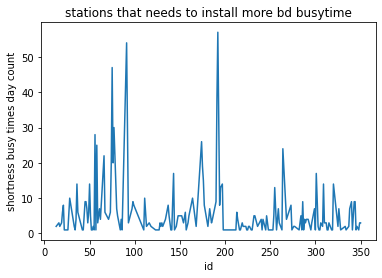

In [219]:
plt.plot(busycount["id"])
plt.title("stations that needs to install more bd busytime")
plt.xlabel("id")
plt.ylabel("shortness busy times day count")
plt.show()

In [223]:
busydaycount = busycount[busycount["id"] >= 10]
len(busydaycount)

26

In [224]:
busydaycount.index

Int64Index([ 28,  36,  50,  56,  58,  66,  74,  75,  76,  77,  91, 111, 143,
            164, 174, 175, 176, 191, 192, 195, 197, 255, 264, 301, 309, 320],
           dtype='int64', name='level_1')

In [227]:
print(" If we analyze the busy times, the stations that need to install more bike docks are 28,  36,  50,  56,  58,  66,  74,  75,  76,  77,  91, 111, 143, 164, 174, 175, 176, 191, 192, 195, 197, 255, 264, 301, 309, 320")

 If we analyze the busy times, the stations that need to install more bike docks are 28,  36,  50,  56,  58,  66,  74,  75,  76,  77,  91, 111, 143, 164, 174, 175, 176, 191, 192, 195, 197, 255, 264, 301, 309, 320


Combining two results, the stations that need to install more bike docks are 28, 36, 47, 49,50, 56, 58, 66, 74, 75, 76, 77, 91, 111, 143, 164, 174, 175, 176, 191, 192, 195, 197, 255, 264, 286, 301, 309, 320.